In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
import seaborn as sns
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

#### Data was taken [from Kaggle](https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv)

In [3]:
games_data = pd.read_csv('vgsales.csv', index_col=0)
games_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


I decided to analyze the sales data of top four genres of games from 2007 to 2011. Since they exactly look good with radar chart.

In [4]:
middle_games_data = games_data.query('(Year >= 2007) & (Year <= 2010)')
middle_games_data.Year = middle_games_data.Year.astype('int')
middle_games_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [5]:
genres_to_analise = middle_games_data.Genre.value_counts()[:7].index.values
mask = middle_games_data.Genre.isin(genres_to_analise)
top_genres_middle_games_data = middle_games_data[mask]
pivot_genres_sales_data = top_genres_middle_games_data.pivot_table(index=['Year', 'Genre'],
                                                                   values='Global_Sales',
                                                                   aggfunc='sum')
time_sales = {year: pivot_genres_sales_data.loc[year] for year in range(2007, 2011)}
pivot_genres_sales_data.head()

Global_Sales
Year Genre                     
2007 Action              106.50
     Adventure            24.47
     Misc                 92.27
     Role-Playing         43.89
     Shooter              71.04

The way to ...

In [6]:
plt.rcParams['figure.dpi'] = 96
plt.rcParams['figure.figsize'] = (8, 5)

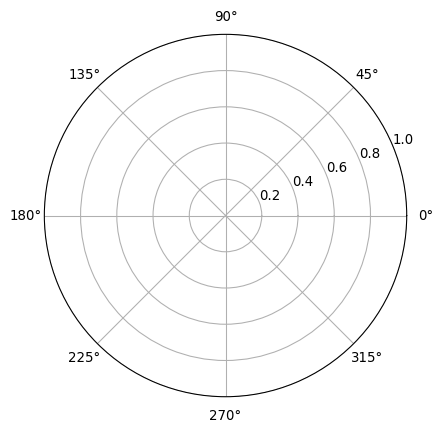

In [7]:
ax = plt.subplot(polar=True)
# or just plt.polar()

In [8]:
year = 2007
categories = genres_to_analise
N = len(categories)
angles = [i / N * 2 * pi for i in range(N)]
angles.append(angles[0])

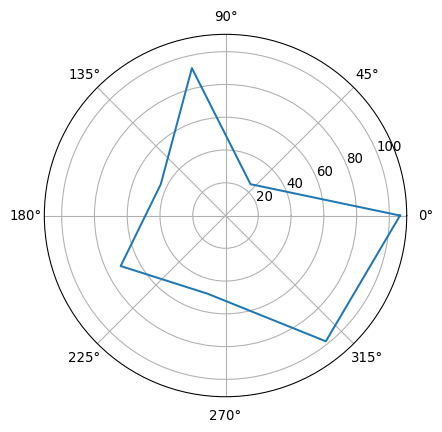

In [9]:
ax = plt.subplot(polar=True)
values = np.append(time_sales[year],
                   time_sales[year].iloc[0])
ax.plot(angles, values)
plt.show()

In [10]:
styles = ['grayscale', 'dark_background', 'classic', '_classic_test_patch']

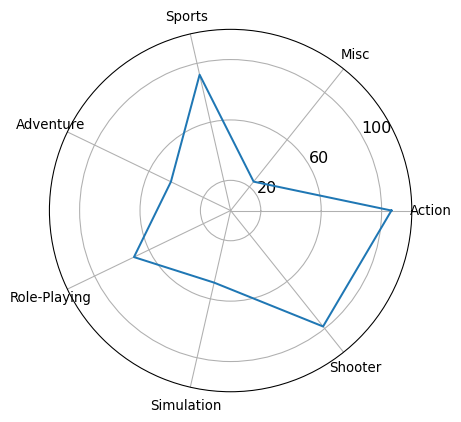

In [11]:
ax = plt.subplot(polar=True)
values = np.append(time_sales[year],
                   time_sales[year].iloc[0])
ax.plot(angles, values)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(30)
plt.yticks([20, 60, 100], color='black', size=12)
plt.ylim(0, 120)

plt.show()

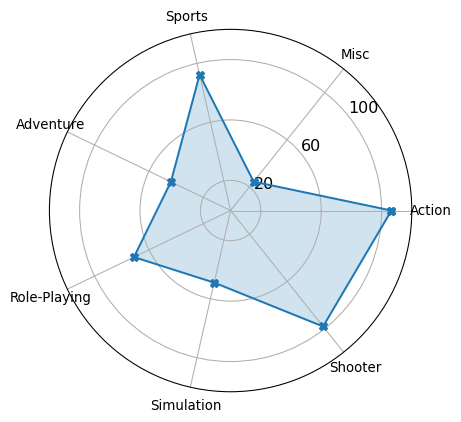

In [12]:
ax = plt.subplot(polar=True)
values = np.append(time_sales[year],
                   time_sales[year].iloc[0])
ax.plot(angles, values, marker='X')
ax.fill(angles, values, alpha=0.2)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(39)
plt.yticks([20, 60, 100], color='black', size=12)
plt.ylim(0, 120)

plt.show()

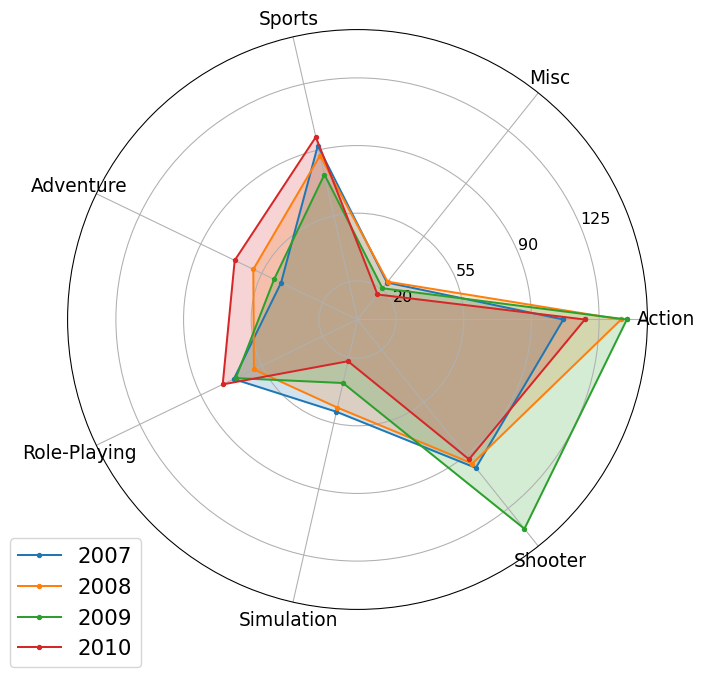

In [13]:
plt.figure(figsize=(10, 8), dpi=96)
#my_palette = plt.cm.get_cmap("Set2", len(range(2007, 2011)))
ax = plt.subplot(polar=True)
for i, year in enumerate(range(2007, 2011)):
    values = np.append(time_sales[year],
                       time_sales[year].iloc[0])
    ax.plot(angles, values, marker='.')
    ax.fill(angles, values, alpha=0.2)

plt.xticks(angles[:-1], categories, fontsize=14, color='black')
plt.legend([str(i) for i in range(2007, 2011)], prop={'size': 16}, loc=(-0.1, -0.1))
plt.yticks([20, 55, 90, 125], color='black', size=12)
plt.ylim(0, 150)


plt.show()

In [15]:
for i in games_data.Name.values:
    if 'S.T.A.L.K.E.R.' in i:
        print(i)

S.T.A.L.K.E.R.: Call of Pripyat
S.T.A.L.K.E.R.: Shadow of Chernobyl
S.T.A.L.K.E.R.: Clear Sky


In [16]:
games_data[games_data.Name.str.startswith('S.T.A.L.K.E.R.:')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
12454,S.T.A.L.K.E.R.: Call of Pripyat,PC,2009.0,Shooter,Namco Bandai Games,0.00,0.05,0.0,0.01,0.06
12624,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007.0,Shooter,THQ,0.01,0.04,0.0,0.01,0.06
14023,S.T.A.L.K.E.R.: Clear Sky,PC,2008.0,Shooter,Deep Silver,0.00,0.03,0.0,0.01,0.04


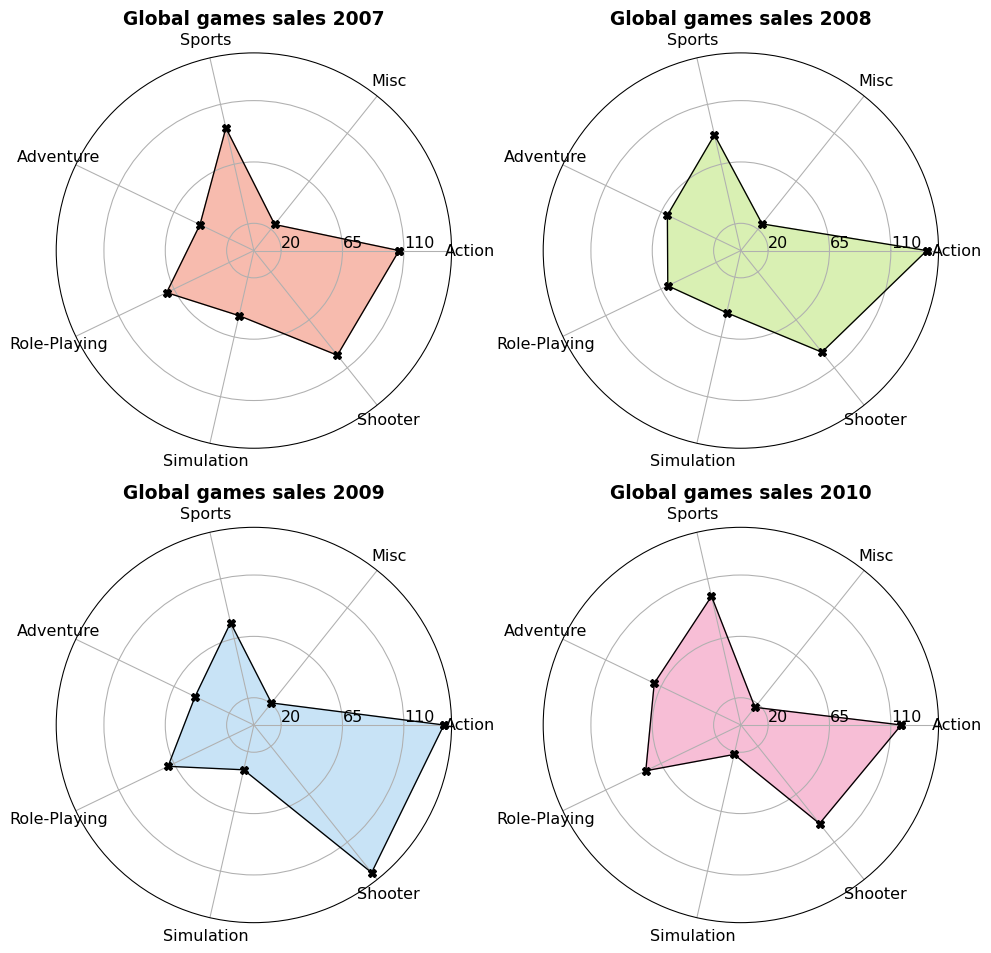

In [21]:
plt.figure(figsize=(12, 12), dpi=96)
colors = ['#F59E8C', '#CAEA93', '#B1D8F3', '#F5A3C5']

for i, year in enumerate(range(2007, 2011)):
    ax = plt.subplot(2, 2, i+1, polar=True)
    values = np.append(time_sales[year],
                   time_sales[year].iloc[0])
    ax.plot(angles, values, color='black', marker='X', lw=1)
    ax.fill(angles, values, alpha=0.7, color=colors[i])
    plt.xticks(angles[:-1], categories, fontsize=12, color='black')
    plt.yticks([20, 65, 110], color='black', size=12)
    plt.ylim(0, 145)
    ax.set_rlabel_position(0)
    plt.title(f'Global games sales {year}', fontweight='bold', fontsize=14)